## Note: Helper Download files

In [1]:
import requests

def download_file(url, filename):
    """
    Downloads a file from a URL and saves it locally.
    
    Parameters:
    url (str): The URL of the file to download.
    filename (str): The name of the file to save.
    """
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, 'wb') as file:
            file.write(response.content)
        print(f"File downloaded and saved as {filename}")
    else:
        print(f"Failed to download file. Status code: {response.status_code}")

# A. Data Exercises - Minh Nguyen (NolanM)

In [2]:
file_path_data = "./content/advertising.csv"
file_url_data = "https://drive.google.com/uc?id=1iA0WmVfW88HyJvTBSQDI5vesf-pgKabq"
download_file(file_url_data, file_path_data)

File downloaded and saved as ./content/advertising.csv


In [3]:
import pandas as pd
df = pd.read_csv(file_path_data)
data = df.to_numpy()

In [4]:
summary = pd.concat([df.max(), df.idxmax()], axis=1)
summary.columns = ['Max Value', 'Index']
print(summary)
df.describe()

           Max Value  Index
TV             296.4    101
Radio           49.6     58
Newspaper      114.0     16
Sales           27.0    175


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


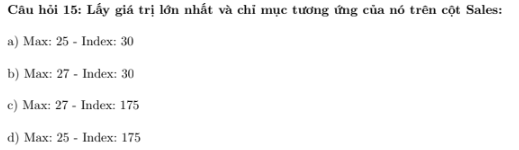

### Ans 15: C

---

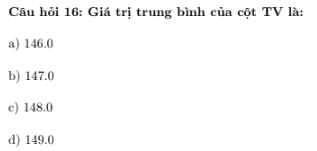

### Ans 16: B

---

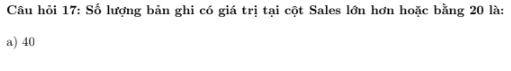
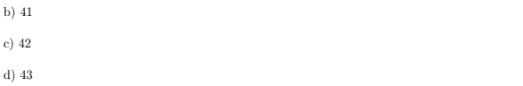

In [5]:
filtered_df = df[df['Sales'] >= 20]
len(filtered_df)

40

### Ans 17: A

---

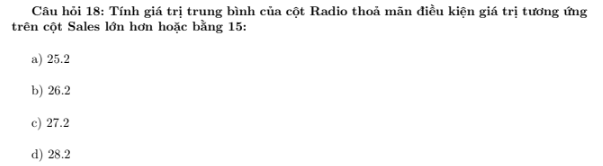

In [6]:
filtered_df = df[df['Sales'] >= 15]
print(filtered_df['Radio'].mean())

26.22293577981651


### Ans 18: B

---

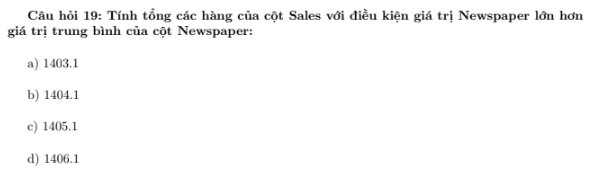

In [7]:
filtered_df = df[df['Newspaper'] >= df['Newspaper'].mean()]
print(filtered_df['Sales'].sum())

1405.1


### Ans 19: C

---

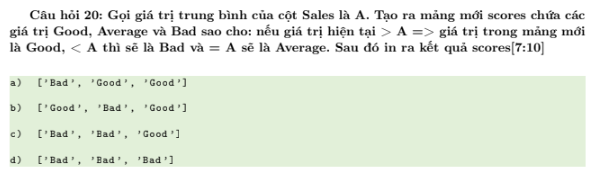

In [8]:
mean_sales = df['Sales'].mean()
df['scores'] = df['Sales'].apply(lambda x: 'Good' if x > mean_sales else 'Bad' if x < mean_sales else 'Average')
df['scores'][7:10]

7     Bad
8     Bad
9    Good
Name: scores, dtype: object

### Ans 20: C

---

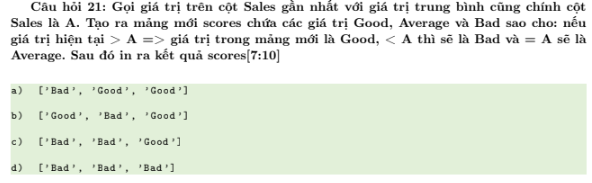

In [9]:
mean_sales = int(df['Sales'].mean())
df['scores'] = df['Sales'].apply(lambda x: 'Good' if x > mean_sales else 'Bad' if x < mean_sales else 'Average')
df['scores'][7:10]

7     Bad
8     Bad
9    Good
Name: scores, dtype: object

### Ans 21: C

---

# B. Image Process Exercises

In [10]:
file_path_ = "./content/dog.jpeg"
file_url = "https://drive.google.com/uc?id=1i9dqan21DjQoG5Q_VEvm0LrVwAlXD0vB"
download_file(file_url, file_path_)

!pip install matplotlib
import matplotlib.image as mpimg
img = mpimg.imread('./content/dog.jpeg')

File downloaded and saved as ./content/dog.jpeg



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Lightness Techniques
+ Lightness: Tính giá trị trung bình của giá trị lớn nhất và nhỏ nhất cho các kênh màu: (max(R,G,B) + min(R,G,B))/2
+ Average: Tính giá trị trung bình của 3 kênh màu: (R+G+B)/3
+ Luminosity: Nhân hệ số tương ứng của 3 kênh màu như sau: 0.21*R + 0.72*G + 0.07*B

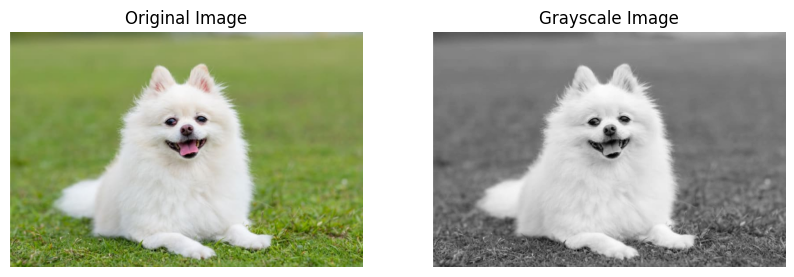

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

class ImageProcessor:
    def __init__(self, image_path, method='average'):
        self.list_method_available = ['lightness','average','luminosity']
        if method not in self.list_method_available:
            return f"The method: {method} is not available, available methods are:{self.list_method_available}. Please input again!"
        if image_path is None:
            return "The image path is not valid. Please input image again"
        self.image_path = image_path
        self.original_image = cv2.imread(image_path)
        self.gray_image = self.convert_to_gray_lightness_method() if method == 'lightness' else self.convert_to_gray_average_method() if method == 'average' else self.convert_to_gray_luminosity_method()
        
    def convert_to_gray_lightness_method(self):
        if self.original_image is not None:
            (row, col) = self.original_image.shape[0:2]
            self.gray_image = np.zeros((row, col), dtype=np.uint8)
            for i in range(row):
                for j in range(col):
                    b, g, r = self.original_image[i, j]
                    max_val = max(b, g, r)
                    min_val = min(b, g, r)
                    self.gray_image[i, j] = (max_val + min_val) // 2
            return self.gray_image
        else:
            print("Image not loaded properly.")
            
    def convert_to_gray_average_method(self):
        if self.original_image is not None:
            (row, col) = self.original_image.shape[0:2]
            self.gray_image = np.zeros((row, col), dtype=np.uint8)
            for i in range(row):
                for j in range(col):
                    # Find the average of the BGR pixel values
                    self.gray_image[i, j] = int(np.mean(self.original_image[i, j]))
            return self.gray_image
        else:
            print("Image not loaded properly.")

    def convert_to_gray_luminosity_method(self):
        if self.original_image is not None:
            (row, col) = self.original_image.shape[0:2]
            self.gray_image = np.zeros((row, col), dtype=np.uint8)
            for i in range(row):
                for j in range(col):
                    b, g, r = self.original_image[i, j]
                    gray_value = int(0.21 * r + 0.72 * g + 0.07 * b)
                    self.gray_image[i, j] = np.clip(gray_value, 0, 255)
            return self.gray_image
        else:
            print("Image not loaded properly.")

    def display_images(self):
        if self.original_image is not None and self.gray_image is not None:
            plt.figure(figsize=(10, 5))
            
            # Display original image
            plt.subplot(1, 2, 1)
            plt.imshow(cv2.cvtColor(self.original_image, cv2.COLOR_BGR2RGB))
            plt.title('Original Image')
            plt.axis('off')
            
            # Display grayscale image
            plt.subplot(1, 2, 2)
            plt.imshow(self.gray_image, cmap='gray')
            plt.title('Grayscale Image')
            plt.axis('off')
            
            plt.show()
        else:
            print("Images are not available for display.")

image_processor = ImageProcessor('./content/dog.jpeg')
image_processor.display_images()

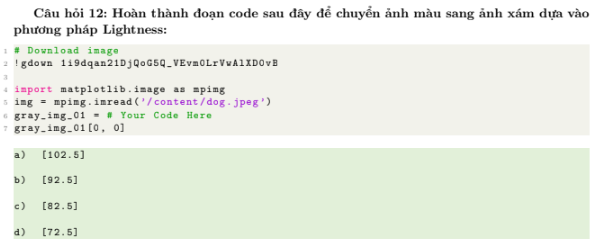

In [12]:
image_processor = ImageProcessor('./content/dog.jpeg',  method='lightness')
image_processor.gray_image[0,0]

C:\Users\NolanM\AppData\Local\Temp\ipykernel_19196\661011680.py:25: RuntimeWarning: overflow encountered in scalar add
  self.gray_image[i, j] = (max_val + min_val) // 2


102

### Ans 12: A

---

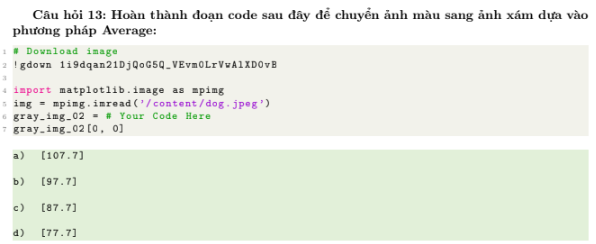

In [13]:
image_processor = ImageProcessor('./content/dog.jpeg')
image_processor.gray_image[0,0]

107

### Ans 13: A

---

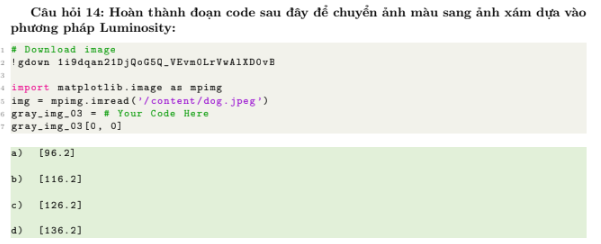

In [14]:
image_processor = ImageProcessor('./content/dog.jpeg',  method='luminosity')
image_processor.gray_image[0,0]

126

### Ans 14: C

---

# C. Multiple Choice Exercises

## I. Numpy

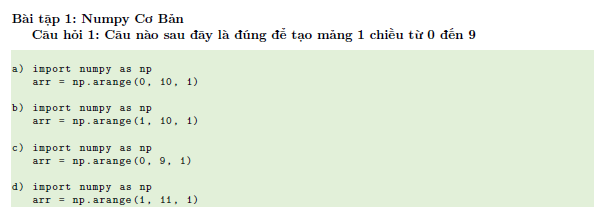

In [15]:
import numpy as np
arr = np.arange (0, 10, 1)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Ans 1: A

---

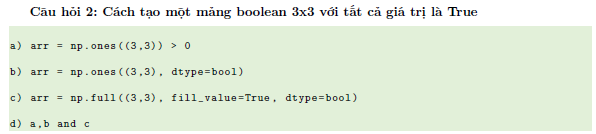

In [16]:
arr = np.full((3 ,3),fill_value=True, dtype = bool)
arr

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

### Ans 2: C

---

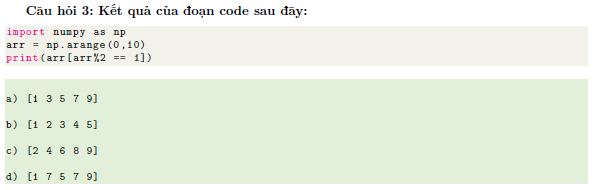

In [17]:
arr = np.arange(0 ,10)
print(arr[arr%2 == 1])

[1 3 5 7 9]


### Ans 3: A

---

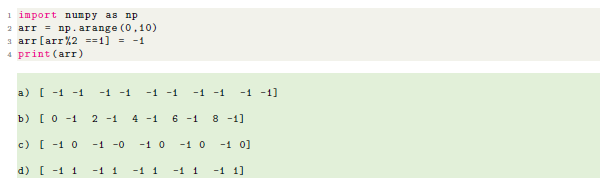

In [18]:
arr = np. arange (0 ,10)
arr[arr%2==1]= -1
print(arr)

[ 0 -1  2 -1  4 -1  6 -1  8 -1]


### Ans 4: B

---

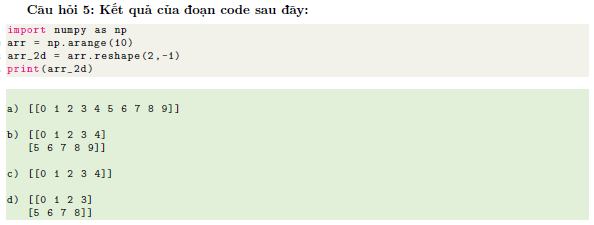

In [19]:
arr = np. arange (10)
arr_2d = arr.reshape(2, -1)
print(arr_2d)

[[0 1 2 3 4]
 [5 6 7 8 9]]


### Ans 5: B

---

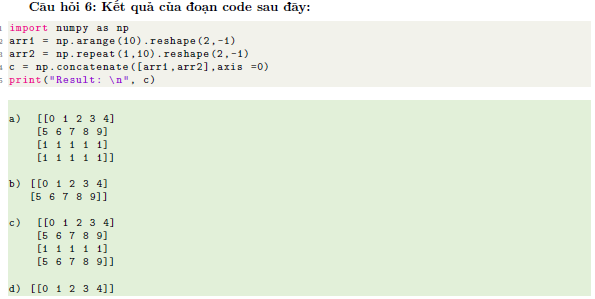

In [20]:
arr1 = np.arange(10).reshape (2 , -1)
arr2 = np.repeat (1 ,10).reshape (2 , -1)
c = np.concatenate([arr1, arr2], axis=0)
print("Result: \n", c)

Result: 
 [[0 1 2 3 4]
 [5 6 7 8 9]
 [1 1 1 1 1]
 [1 1 1 1 1]]


### Ans 6: A

---

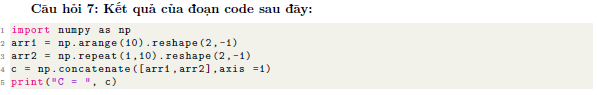
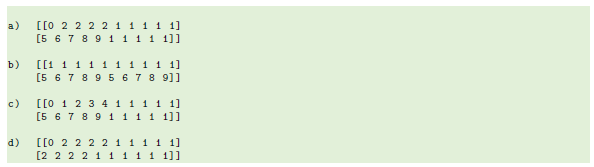

In [21]:
arr1 = np.arange(10).reshape(2, -1)
arr2 = np.repeat (1 ,10).reshape(2, -1)
c = np.concatenate([arr1, arr2 ], axis=1)
print("C = ", c)

C =  [[0 1 2 3 4 1 1 1 1 1]
 [5 6 7 8 9 1 1 1 1 1]]


### Ans 7: C

---

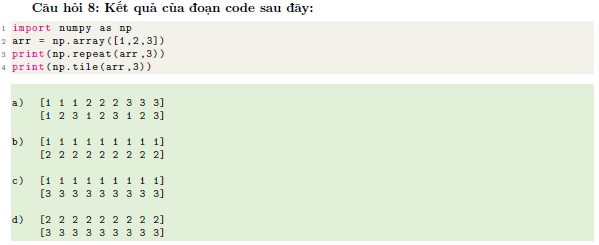

In [22]:
arr = np.array([1 ,2 ,3])
print(np.repeat(arr ,3))
print(np.tile(arr ,3))

[1 1 1 2 2 2 3 3 3]
[1 2 3 1 2 3 1 2 3]


### Ans 8: A

---

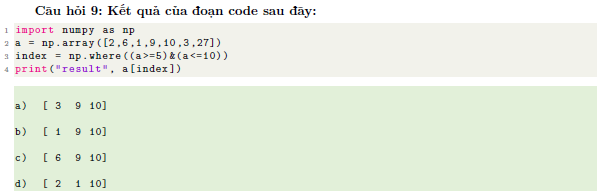

In [23]:
a = np.array([2 ,6 ,1 ,9 ,10 ,3 ,27])
index = np.where((a >=5) &(a <=10))
print("result ", a[index])

result  [ 6  9 10]


### Ans 9: C

---

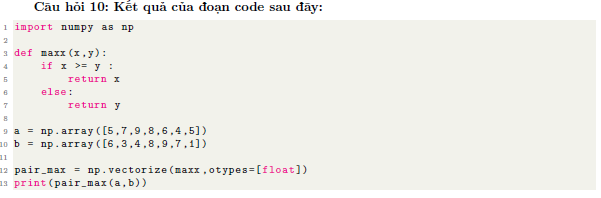
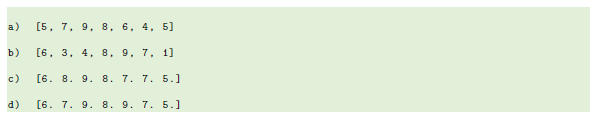

In [24]:
def maxx (x,y):
    if x >= y :
        return x
    else :
        return y

a = np.array([5 ,7 ,9 ,8 ,6 ,4 ,5])
b = np.array([6 ,3 ,4 ,8 ,9 ,7 ,1])

pair_max = np.vectorize(maxx, otypes=[float])
print(pair_max(a,b))

[6. 7. 9. 8. 9. 7. 5.]


### Ans 10: D

---

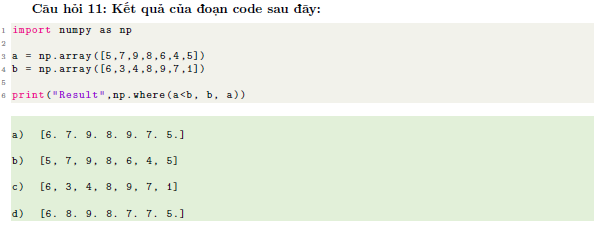

In [25]:
a = np.array([5 ,7 ,9 ,8 ,6 ,4 ,5])
b = np.array([6 ,3 ,4 ,8 ,9 ,7 ,1])

print("Result ",np.where(a<b, b, a))

Result  [6 7 9 8 9 7 5]


### Ans 11: A

---